In [50]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns 


In [51]:
df = pd.read_csv(r'C:\Users\DC\Downloads\DATA SET\TRIP ADVISOR\tripadvisor_mbs_review_from201501_v2.csv', encoding='latin-1')

In [52]:
df.head(10)

,user_id,contributions,date_of_stay,ratings,title,content
0,1,0,2022/8,5,Great stay,Whole team was great and service 10/10. Receiv...
1,2,81,2022/7,5,MBS a luxurious destination,"We are a family of 6 ( my 85 yearold father, 7..."
2,3,6,2022/8,5,MBS truly understands their clients!,"Throughout my stay, I felt that this establish..."
3,3,13,2016/3,4,Wonderful Hotel but the service isn't really e...,I would say the architect of this hotel is fas...
4,4,205,2022/10,5,Amazing hotel,"Amazing hotel, the check-in staff member was e..."
5,5,53,2022/10,2,The pool is nice but hotel room and service is...,"You can go there for casino and infinity pool,..."
6,6,44,2022/9,5,MBS - what a hotel,Clearly beautiful place not just an iconic one...
7,7,3,2022/9,5,Fantastic Hotel - A Must Stay,It was my first time to Singapore which was fo...
8,8,1,2022/9,1,Debit card charged without refund after check ...,Stay from 05 sep to 08 sep 2022. Hotel request...
9,9,20,2022/9,5,Best View of Singapore,Marina Bay sands is a must visit place for any...


In [53]:
df.describe

<bound method NDFrame.describe of        user_id  contributions date_of_stay  ratings  \
0            1              0       2022/8        5   
1            2             81       2022/7        5   
2            3              6       2022/8        5   
3            3             13       2016/3        4   
4            4            205      2022/10        5   
...        ...            ...          ...      ...   
10227     9778            153       2015/1        4   
10228     9779             50       2015/1        4   
10229     9780             40      2014/12        5   
10230     9781              5      2014/12        5   
10231     9782             44       2015/1        5   

                                                   title  \
0                                             Great stay   
1                            MBS a luxurious destination   
2                   MBS truly understands their clients!   
3      Wonderful Hotel but the service isn't really e...   
4    

In [54]:
import re
from nltk.corpus import stopwords

# Function to remove punctuation
def remove_punctuation(text):
    return re.sub(r'[^\w\s]', '', text)

# Function to remove stopwords
def remove_stopwords(text):
    stop_words = set(stopwords.words('english'))
    tokens = text.split()
    filtered_tokens = [word for word in tokens if word.lower() not in stop_words]
    return ' '.join(filtered_tokens)

# Apply the functions to the 'title' and 'content' columns
df['title'] = df['title'].apply(remove_punctuation)
df['title'] = df['title'].apply(remove_stopwords)

df['content'] = df['content'].apply(remove_punctuation)
df['content'] = df['content'].apply(remove_stopwords)


print(df.head(5))


   user_id  contributions date_of_stay  ratings  \
0        1              0       2022/8        5   
1        2             81       2022/7        5   
2        3              6       2022/8        5   
3        3             13       2016/3        4   
4        4            205      2022/10        5   

                                             title  \
0                                       Great stay   
1                        MBS luxurious destination   
2                    MBS truly understands clients   
3  Wonderful Hotel service isnt really exceptional   
4                                    Amazing hotel   

                                             content  
0  Whole team great service 1010 Received everyth...  
1  family 6 85 yearold father 79 year old mother ...  
2  Throughout stay felt establishment excelled li...  
3  would say architect hotel fascinating super hi...  
4  Amazing hotel checkin staff member exceptional...  


In [55]:
df['review'] = df['title'].astype(str) + ' ' + df['content'].astype(str)

In [56]:
df

,user_id,contributions,date_of_stay,ratings,title,content,review
0,1,0,2022/8,5,Great stay,Whole team great service 1010 Received everyth...,Great stay Whole team great service 1010 Recei...
1,2,81,2022/7,5,MBS luxurious destination,family 6 85 yearold father 79 year old mother ...,MBS luxurious destination family 6 85 yearold ...
2,3,6,2022/8,5,MBS truly understands clients,Throughout stay felt establishment excelled li...,MBS truly understands clients Throughout stay ...
3,3,13,2016/3,4,Wonderful Hotel service isnt really exceptional,would say architect hotel fascinating super hi...,Wonderful Hotel service isnt really exceptiona...
4,4,205,2022/10,5,Amazing hotel,Amazing hotel checkin staff member exceptional...,Amazing hotel Amazing hotel checkin staff memb...
...,...,...,...,...,...,...,...
10227,9778,153,2015/1,4,awesome last night Singaporehowever service is...,decided stay Marina Bay Sands last night Singa...,awesome last night Singaporehowever service is...
10228,9779,50,2015/1,4,Nice,paid nearly 800 AUS one night stay expecting w...,Nice paid nearly 800 AUS one night stay expect...
10229,9780,40,2014/12,5,Swimming top world,hotel read course swimming pool top hotels gre...,Swimming top world hotel read course swimming ...
10230,9781,5,2014/12,5,Great hotel,must say view room amazing got gardens bay vie...,Great hotel must say view room amazing got gar...


In [57]:
# Convert 'date_of_stay' column to datetime type
df['date_of_stay'] = pd.to_datetime(df['date_of_stay'], format='%Y/%m')

# Add the reformatted dates as a new column in the DataFrame
df['reformatted_dates'] = df['date_of_stay'].dt.strftime('%d-%m-%Y')

# Optionally, you can drop the original 'date_of_stay' column if needed
df.drop(columns=['date_of_stay'], inplace=True)

In [58]:
df

,user_id,contributions,ratings,title,content,review,reformatted_dates
0,1,0,5,Great stay,Whole team great service 1010 Received everyth...,Great stay Whole team great service 1010 Recei...,01-08-2022
1,2,81,5,MBS luxurious destination,family 6 85 yearold father 79 year old mother ...,MBS luxurious destination family 6 85 yearold ...,01-07-2022
2,3,6,5,MBS truly understands clients,Throughout stay felt establishment excelled li...,MBS truly understands clients Throughout stay ...,01-08-2022
3,3,13,4,Wonderful Hotel service isnt really exceptional,would say architect hotel fascinating super hi...,Wonderful Hotel service isnt really exceptiona...,01-03-2016
4,4,205,5,Amazing hotel,Amazing hotel checkin staff member exceptional...,Amazing hotel Amazing hotel checkin staff memb...,01-10-2022
...,...,...,...,...,...,...,...
10227,9778,153,4,awesome last night Singaporehowever service is...,decided stay Marina Bay Sands last night Singa...,awesome last night Singaporehowever service is...,01-01-2015
10228,9779,50,4,Nice,paid nearly 800 AUS one night stay expecting w...,Nice paid nearly 800 AUS one night stay expect...,01-01-2015
10229,9780,40,5,Swimming top world,hotel read course swimming pool top hotels gre...,Swimming top world hotel read course swimming ...,01-12-2014
10230,9781,5,5,Great hotel,must say view room amazing got gardens bay vie...,Great hotel must say view room amazing got gar...,01-12-2014


In [59]:
df["ratings"].value_counts()

ratings
5    6158
4    2414
3     993
2     334
1     333
Name: count, dtype: int64

In [60]:
import plotly.express as px

ratings = df["ratings"].value_counts().reset_index()

# Rename columns for clarity
ratings.columns = ["Rating", "Frequency"]


custom_colors = ["skyblue", "yellowgreen", 'tomato', "blue", "red"]


fig = px.bar(ratings, x="Rating", y="Frequency", color="Rating",
             color_discrete_sequence=custom_colors,
             title="Hotel Reviews Ratings",
             labels={"Rating": "Rating", "Frequency": "Frequency"},
             template="plotly_dark",  # Change the template if needed
             width=800, height=600)

fig.show()


In [61]:

numbers = [150, 250, 100, 200, 120]
labels = ['5 star', '4 star', '3 star', '2 star', '1 star']
colors = ["skyblue", "yellowgreen", 'tomato', "blue", "red"]

def plot_pie_chart(labels, numbers, colors):
    fig = px.pie(names=labels, values=numbers, color=labels, color_discrete_sequence=colors,
                 hole=0.7, title="Hotel Reviews Ratings", labels={'names': 'Rating'})
    
    fig.update_traces(textposition='inside', textinfo='percent+label')
    fig.update_layout(showlegend=False)
    
    fig.show()

plot_pie_chart(labels, numbers, colors)


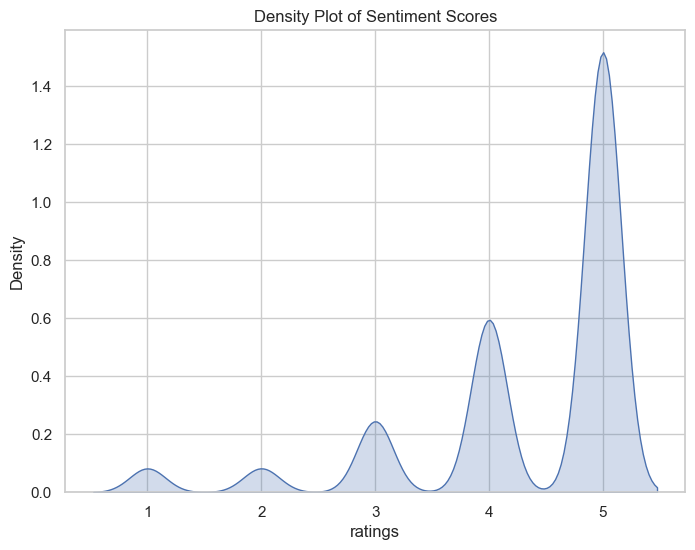

In [62]:
sns.set(style="whitegrid")

# Density Plot
plt.figure(figsize=(8,6))
sns.kdeplot(data=df, x='ratings', fill=True)
plt.title('Density Plot of Sentiment Scores')
plt.show()


**EXPEREMENTING WITH AMENITIES**

In [63]:
!pip install tabulate


[notice] A new release of pip is available: 23.3.1 -> 23.3.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [64]:
from collections import Counter
from tabulate import tabulate


amenities_keywords = ["swimming pool", "gym", "spa", "Wi-Fi", "parking", "restaurant"]

# Extract amenities from review text and create a new column
df["amenities"] = df["review"].apply(lambda x: ", ".join(keyword for keyword in amenities_keywords if re.search(keyword, x, re.IGNORECASE)))

# Count the frequency of appearance for each amenity
amenities_frequency = Counter(df["amenities"].str.split(", ").sum())

# Filter out rows with an empty string in the 'Amenity' column
amenities_df = pd.DataFrame([(amenity, frequency) for amenity, frequency in amenities_frequency.items() if amenity != ''], columns=['Amenity', 'Frequency'])

# Sort the DataFrame by frequency
amenities_df = amenities_df.sort_values(by='Frequency', ascending=False)


print(tabulate(amenities_df, headers='keys', tablefmt='pretty', showindex=False))


+---------------+-----------+
|    Amenity    | Frequency |
+---------------+-----------+
|  restaurant   |   2351    |
|      spa      |   2037    |
| swimming pool |    797    |
|      gym      |    423    |
|    parking    |    68     |
+---------------+-----------+


**WOODCLOUD INTRO**

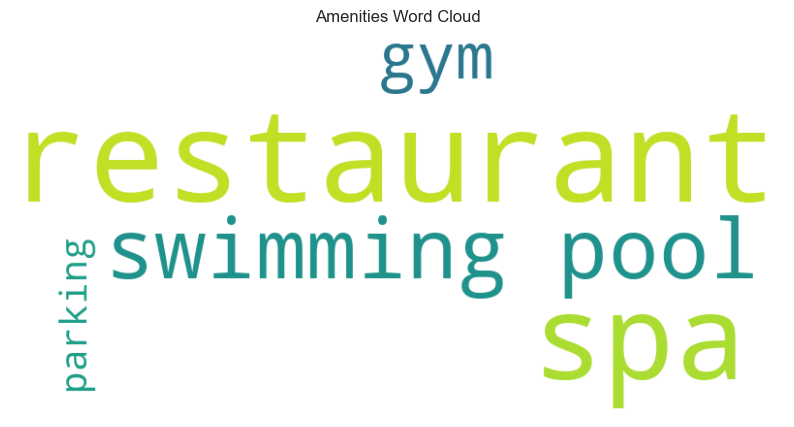

In [65]:
from wordcloud import WordCloud
import re

# Generate a WordCloud
wordcloud = WordCloud(width=800, height=400, background_color='white').generate_from_frequencies(amenities_frequency)

# Plot the WordCloud
plt.figure(figsize=(10, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title("Amenities Word Cloud")
plt.show()


In [66]:
fig = px.bar(amenities_df, x='Amenity', y='Frequency', title='Amenities Frequency',
             labels={'Frequency': 'Frequency Count', 'Amenity': 'Amenity'},
             color='Frequency')
fig.show()

**PRE-PROCESSING DATA FOR SENTIMNENT ANALYSIS**

In [67]:
df.tail(5)

,user_id,contributions,ratings,title,content,review,reformatted_dates,amenities
10227,9778,153,4,awesome last night Singaporehowever service is...,decided stay Marina Bay Sands last night Singa...,awesome last night Singaporehowever service is...,01-01-2015,spa
10228,9779,50,4,Nice,paid nearly 800 AUS one night stay expecting w...,Nice paid nearly 800 AUS one night stay expect...,01-01-2015,
10229,9780,40,5,Swimming top world,hotel read course swimming pool top hotels gre...,Swimming top world hotel read course swimming ...,01-12-2014,"swimming pool, spa"
10230,9781,5,5,Great hotel,must say view room amazing got gardens bay vie...,Great hotel must say view room amazing got gar...,01-12-2014,spa
10231,9782,44,5,Lives reputation AMAZING,moment stepped taxi place amazing levels servi...,Lives reputation AMAZING moment stepped taxi p...,01-01-2015,


In [68]:
columns_to_drop= ['title', 'content', 'contributions', 'user_id', 'reformatted_dates','amenities']
df.drop(columns=columns_to_drop, inplace=True)
df

,ratings,review
0,5,Great stay Whole team great service 1010 Recei...
1,5,MBS luxurious destination family 6 85 yearold ...
2,5,MBS truly understands clients Throughout stay ...
3,4,Wonderful Hotel service isnt really exceptiona...
4,5,Amazing hotel Amazing hotel checkin staff memb...
...,...,...
10227,4,awesome last night Singaporehowever service is...
10228,4,Nice paid nearly 800 AUS one night stay expect...
10229,5,Swimming top world hotel read course swimming ...
10230,5,Great hotel must say view room amazing got gar...


In [69]:
df_neg = df.loc[df["ratings"] < 4]
df_neg = df_neg.reset_index(drop=True)

df_five = df.loc[df["ratings"] == 5]
df_five = df_five.reset_index(drop=True)

print(len(df_neg))
print(len(df_five))

1660
6158


In [70]:
df_pos = df_five.loc[:len(df_neg)]

print(len(df_pos))
print(len(df_neg))

1661
1660


In [71]:
df_all = pd.concat([df_neg, df_pos], axis = 0)
df_all = df_all.reset_index(drop=True)

print(len(df_all))


3321


**CREATING A SENTIMENT COLUMN**

In [72]:

df_all["Sentiment"] = np.where(df_all["ratings"] == 5, "Positive" , "Negetive")


In [73]:
df_all = df_all.sample(frac = 1)
df_all = df_all.reset_index(drop = True)
df_all.head()

,ratings,review,Sentiment
0,5,Amazing stayed one night July 2019 gosh wish c...,Positive
1,5,Great Experience Stayed family great timeexper...,Positive
2,5,First time Sigapore lovely hotel WOW experienc...,Positive
3,3,Overrated Stayed room 925 December 22 say stay...,Negetive
4,1,Nice hotel severely lacking service begin sayi...,Negetive


**USING A SIMPLE SVM MODEL FOR ANALYSIS**



In [74]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(df_all.review, df_all.Sentiment)


In [75]:
from sklearn.feature_extraction.text import CountVectorizer
v = CountVectorizer()

x_train_vec = v.fit_transform(x_train)
x_test_vec = v.transform(x_test)

In [76]:
from sklearn import svm
clf_svm = svm.SVC(kernel = "linear")
clf_svm.fit(x_train_vec, y_train)
clf_svm.score(x_test_vec, y_test)

0.901323706377858

**SIMPLE TEST**

In [77]:
rev = ["The breakfast buffet, a saving grace in its variety and quality, momentarily elevated the overall experience. However, the transient joy derived from culinary delights could not fully compensate for the inconsistency that defined the stay."]
rev_vec = v.transform(rev)
clf_svm.predict(rev_vec)

array(['Negetive'], dtype=object)

**CLASSIFICATION REPORT || TESTING**

In [78]:
from sklearn.metrics import classification_report


test_reviews = [
    "Amenities mirrored the commitment to excellence, with a generously sized pool, a state-of-the-art fitness center, and a spa that surpassed expectations. Every facet of recreational indulgence was meticulously crafted to enhance the overall well-being of guests, adding an extra layer of delight to the stay.",
    # The breakfast buffet, a saving grace in its variety and quality, momentarily elevated the overall experience. However, the transient joy derived from culinary delights could not fully compensate for the inconsistency that defined the stay.

]

true_labels = ['Positive']  

# Vectorize the test set reviews
test_vec = v.transform(test_reviews)

# Predict sentiment for the test set
predictions = clf_svm.predict(test_vec)

# Calculate metric scores
classification_metrics = classification_report(true_labels, predictions, zero_division=1)


print("The predicted sentiments for the test set are:", predictions)
print("\nClassification Report:")
print(classification_metrics)


The predicted sentiments for the test set are: ['Positive']

Classification Report:
              precision    recall  f1-score   support

    Positive       1.00      1.00      1.00         1

    accuracy                           1.00         1
   macro avg       1.00      1.00      1.00         1
weighted avg       1.00      1.00      1.00         1



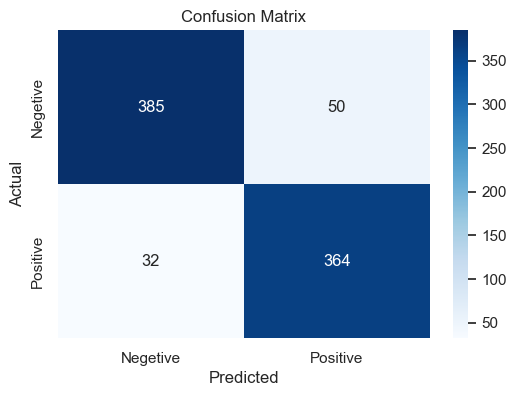

In [79]:
from sklearn.metrics import confusion_matrix

# Make predictions on the test set
y_pred = clf_svm.predict(x_test_vec)

# Compute the confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Get the unique class labels
classes = sorted(y_test.unique())

plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=classes, yticklabels=classes)
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()

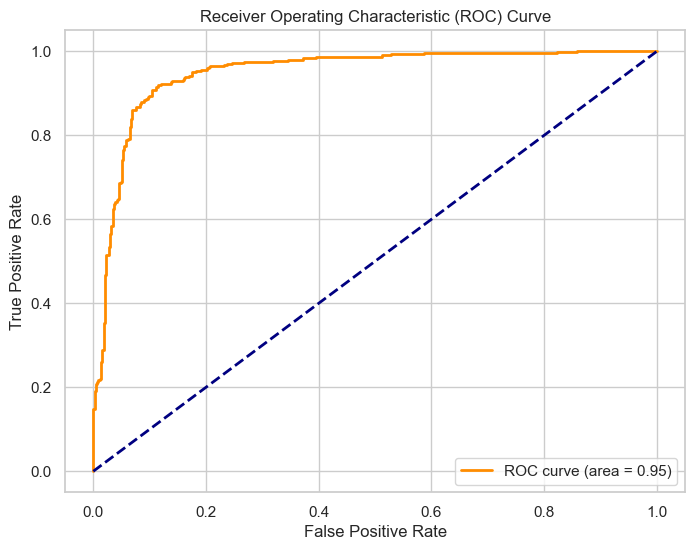

In [80]:
from sklearn.metrics import roc_curve, auc
from sklearn.preprocessing import label_binarize


# Map 'Negative' and 'Positive' labels to 0 and 1
y_test_binary = label_binarize(y_test, classes=['Negative', 'Positive'])

# Get the decision function scores for each class
y_scores = clf_svm.decision_function(x_test_vec)

# Compute ROC curve and ROC area for each class
fpr, tpr, _ = roc_curve(y_test_binary, y_scores)
roc_auc = auc(fpr, tpr)


plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()

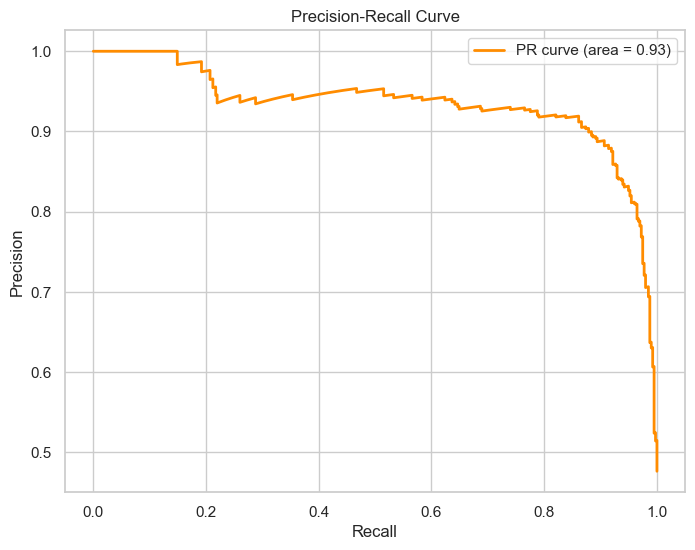

In [81]:
from sklearn.metrics import precision_recall_curve, average_precision_score


# Map 'Negative' and 'Positive' labels to 0 and 1
y_test_binary = label_binarize(y_test, classes=['Negative', 'Positive'])

# Get the decision function scores for each class
y_scores = clf_svm.decision_function(x_test_vec)

# Compute Precision-Recall curve and area under the curve for each class
precision, recall, _ = precision_recall_curve(y_test_binary, y_scores)
average_precision = average_precision_score(y_test_binary, y_scores)

plt.figure(figsize=(8, 6))
plt.plot(recall, precision, color='darkorange', lw=2, label=f'PR curve (area = {average_precision:.2f})')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.legend(loc='upper right')
plt.show()


**WORDCLOUD II**

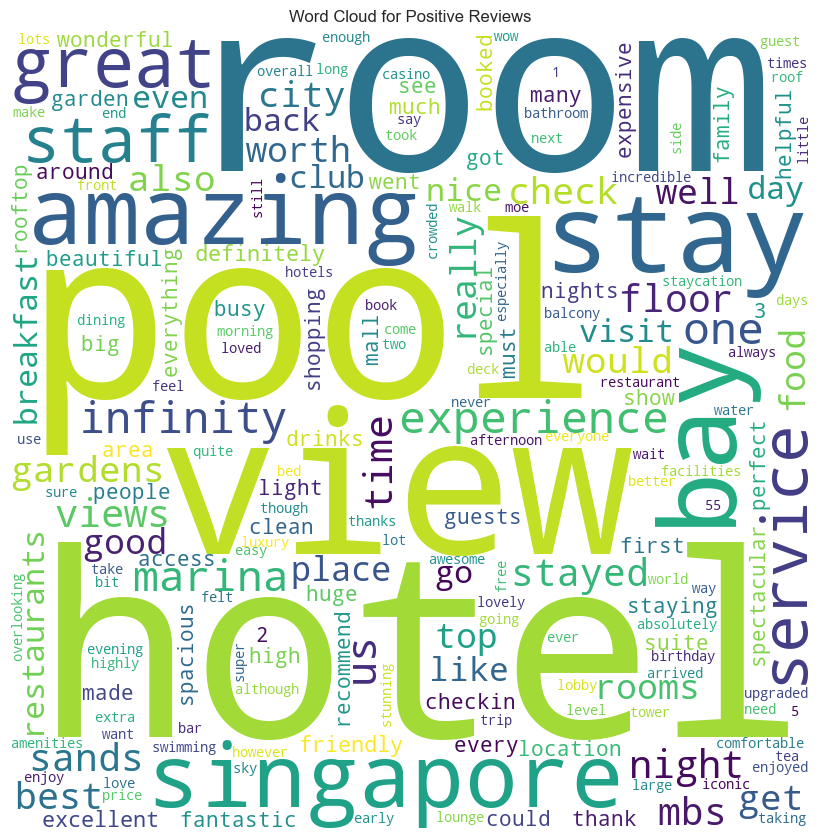

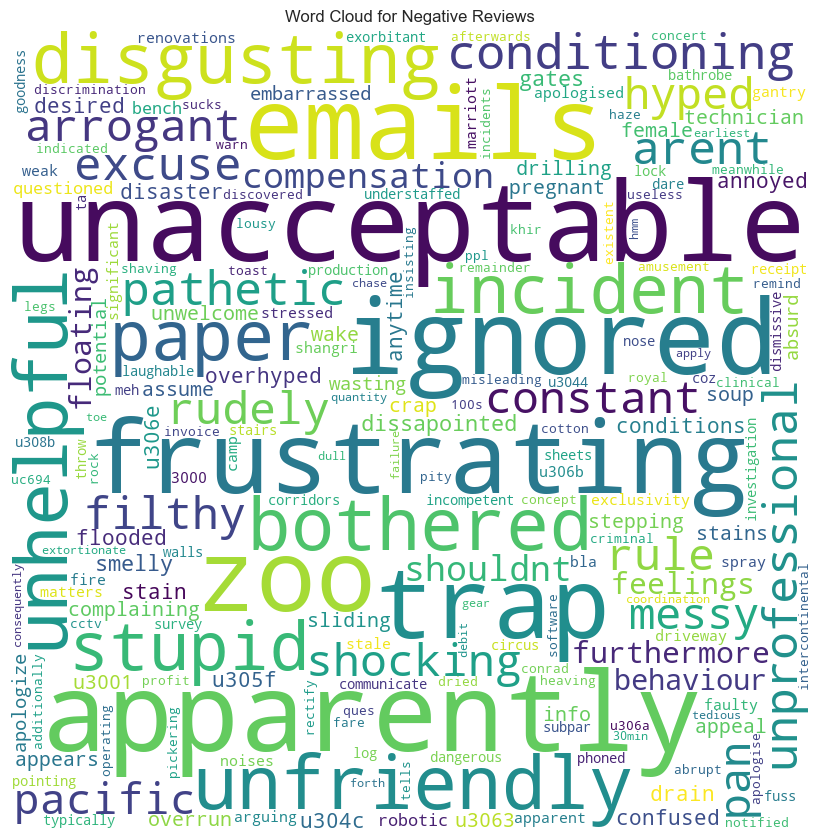

In [82]:
from collections import Counter
from nltk.corpus import stopwords
from wordcloud import WordCloud
import nltk

def generate_wordcloud_and_display_most_frequent_words(df_positive, df_negative, title_positive, title_negative):

    # Remove common English stopwords
    stop_words = set(stopwords.words('english'))

    # Get the most common words in positive reviews
    positive_words = [word.lower() for review in df_positive['review'] for word in str(review).split() if word.lower() not in stop_words]
    positive_word_freq = Counter(positive_words)

    # Get the most common words in negative reviews
    negative_words = [word.lower() for review in df_negative['review'] for word in str(review).split() if word.lower() not in stop_words and word.lower() not in positive_words]
    negative_word_freq = Counter(negative_words)

    # Generate and display positive word cloud
    generate_and_display_wordcloud(positive_word_freq, title_positive)

    # Generate and display negative word cloud
    generate_and_display_wordcloud(negative_word_freq, title_negative)

def generate_and_display_wordcloud(word_freq, title):
    """
    Generate and display a word cloud based on word frequencies.

    Parameters:
    - word_freq (Counter): Word frequencies.
    - title (str): Title for the word cloud.

    Returns:
    None
    """
    # Generate Word Cloud
    wordcloud = WordCloud(width=800, height=800,
                          background_color='white',
                          min_font_size=10).generate_from_frequencies(word_freq)

    # Plot Word Cloud
    plt.figure(figsize=(8, 8), facecolor=None)
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis("off")
    plt.tight_layout(pad=0)
    plt.title(f"Word Cloud for {title}")
    plt.show()

generate_wordcloud_and_display_most_frequent_words(df_pos, df_neg, "Positive Reviews", "Negative Reviews")
